# PROJECT BASED CLO 2 KELOMPOK 8


1.  Aqilah Fedura Ilahi (1301213123)
2.  Muhammad Danu Firjatullah Rachman(1301213439)
3.  Risna Zahira (1301213160)


**METODE : CNN**


# LATANG BELAKANG

Analisis data, atau data analytics, merupakan tahap penting dalam mengumpulkan, merapikan, dan mengekstraksi informasi yang bernilai dari dataset yang besar. Dalam proses analisis ini, dapat diidentifikasi pola dan metrik yang mungkin tidak terlihat secara langsung dalam data mentah. Informasi ini kemudian bisa dimanfaatkan untuk meng-enhance atau meningkatkan proses, sehingga meningkatkan efisiensi sistem secara keseluruhan.

Data yang kami gunakan adalah Student Performance yang Memprediksi Kinerja Siswa pada Pendidikan Menengah Atas (SMA).

Pemilihan data ini didasarkan pada konteks pemahaman dan analisis kinerja siswa pada tingkat pendidikan menengah di dua sekolah Portugis. Data ini mencakup berbagai atribut, termasuk nilai siswa, demografi, fitur sosial, dan atribut sekolah. Penggunaan data ini merupakan praktek yang signifikan dalam pemodelan klasifikasi dan regresi biner/lima tingkat, yang mencerminkan tantangan dunia nyata dalam pemahaman kinerja siswa. Atribut target G3 memiliki korelasi yang kuat dengan atribut G2 dan G1 karena G3 mencerminkan nilai akhir tahun, yang secara alami bergantung pada prestasi awal siswa di periode ke-1 dan ke-2. Data ini menawarkan kesempatan untuk memprediksi kinerja siswa di masa depan, menggabungkan atribut G2 dan G1, dan dapat memiliki dampak yang signifikan dalam meningkatkan pendidikan dan memberikan wawasan berharga bagi pembuat kebijakan dan lembaga pendidikan.





# Ringkasan Metode
Metode yang akan digunakan pada project ini yaitu Convolutional Neural Network atau CNN sebagai baseline model. Kami melakukan ekplorasi model dengan penambahan lebih banyak lapisan Conv1D, penggunakan kernel size yang lebih besar, dan penambahkan lebih banyak neuron di lapisan Dense Exploratory modelnya.

Sehingga didapatkan hasil akhir perbandingan MSE dan MAE, lalu didapatkan performa model terbaik dari 3 model yang dikembangkan.




# 1. Data Preprocessing dan Eksplorasi Data
a. Impor pustaka yang dibutuhkan

In [ ]:
#import pustaka yang diperlukan
import numpy as np
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam


b. Memuat dataset

In [ ]:
# Unduh dataset dari URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
download_path = "student.zip"

# Unduh file ZIP
if not os.path.exists(download_path):
    import urllib.request
    urllib.request.urlretrieve(url, download_path)

# Ekstrak file yang diperlukan
with zipfile.ZipFile(download_path, 'r') as zip_ref:
    zip_ref.extractall("student_data")

# Baca data matematika
df_math = pd.read_csv("student_data/student-mat.csv", sep=';')

# Baca data portugis
df_port = pd.read_csv("student_data/student-por.csv", sep=';')

# Gabungkan kedua data menjadi satu dataset
df = pd.concat([df_math, df_port], axis=0)



c. Eksplorasi Data Awal

In [ ]:
#menampilkan data shape dan info data
print('Data Shape:',df.shape)
print(df.info())
display(df.head())

Data Shape: (1044, 33)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
# Menghapus baris dengan nilai null
df.dropna(inplace=True)


In [ ]:
df_clean = df.dropna()


In [ ]:
#menampikan unique value dari categorical columns
print('Catagorical Column\'s Values\n')
for col in df.select_dtypes(exclude=np.number).columns:
    unique = df[col].unique()
    print('-'*7,f'columns {col}','-'*7)
    print(f'There are {len(unique)} Unique values')
    print(f'5 of which are: {unique[:5]}\n')

Catagorical Column's Values

------- columns school -------
There are 2 Unique values
5 of which are: ['GP' 'MS']

------- columns sex -------
There are 2 Unique values
5 of which are: ['F' 'M']

------- columns address -------
There are 2 Unique values
5 of which are: ['U' 'R']

------- columns famsize -------
There are 2 Unique values
5 of which are: ['GT3' 'LE3']

------- columns Pstatus -------
There are 2 Unique values
5 of which are: ['A' 'T']

------- columns Mjob -------
There are 5 Unique values
5 of which are: ['at_home' 'health' 'other' 'services' 'teacher']

------- columns Fjob -------
There are 5 Unique values
5 of which are: ['teacher' 'other' 'services' 'health' 'at_home']

------- columns reason -------
There are 4 Unique values
5 of which are: ['course' 'other' 'home' 'reputation']

------- columns guardian -------
There are 3 Unique values
5 of which are: ['mother' 'father' 'other']

------- columns schoolsup -------
There are 2 Unique values
5 of which are: ['yes' '

In [ ]:
# Mengubah kategori menjadi angka dengan LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Normalisasi data numerik
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


d. Visualisasi Data

# pengechekan outlier




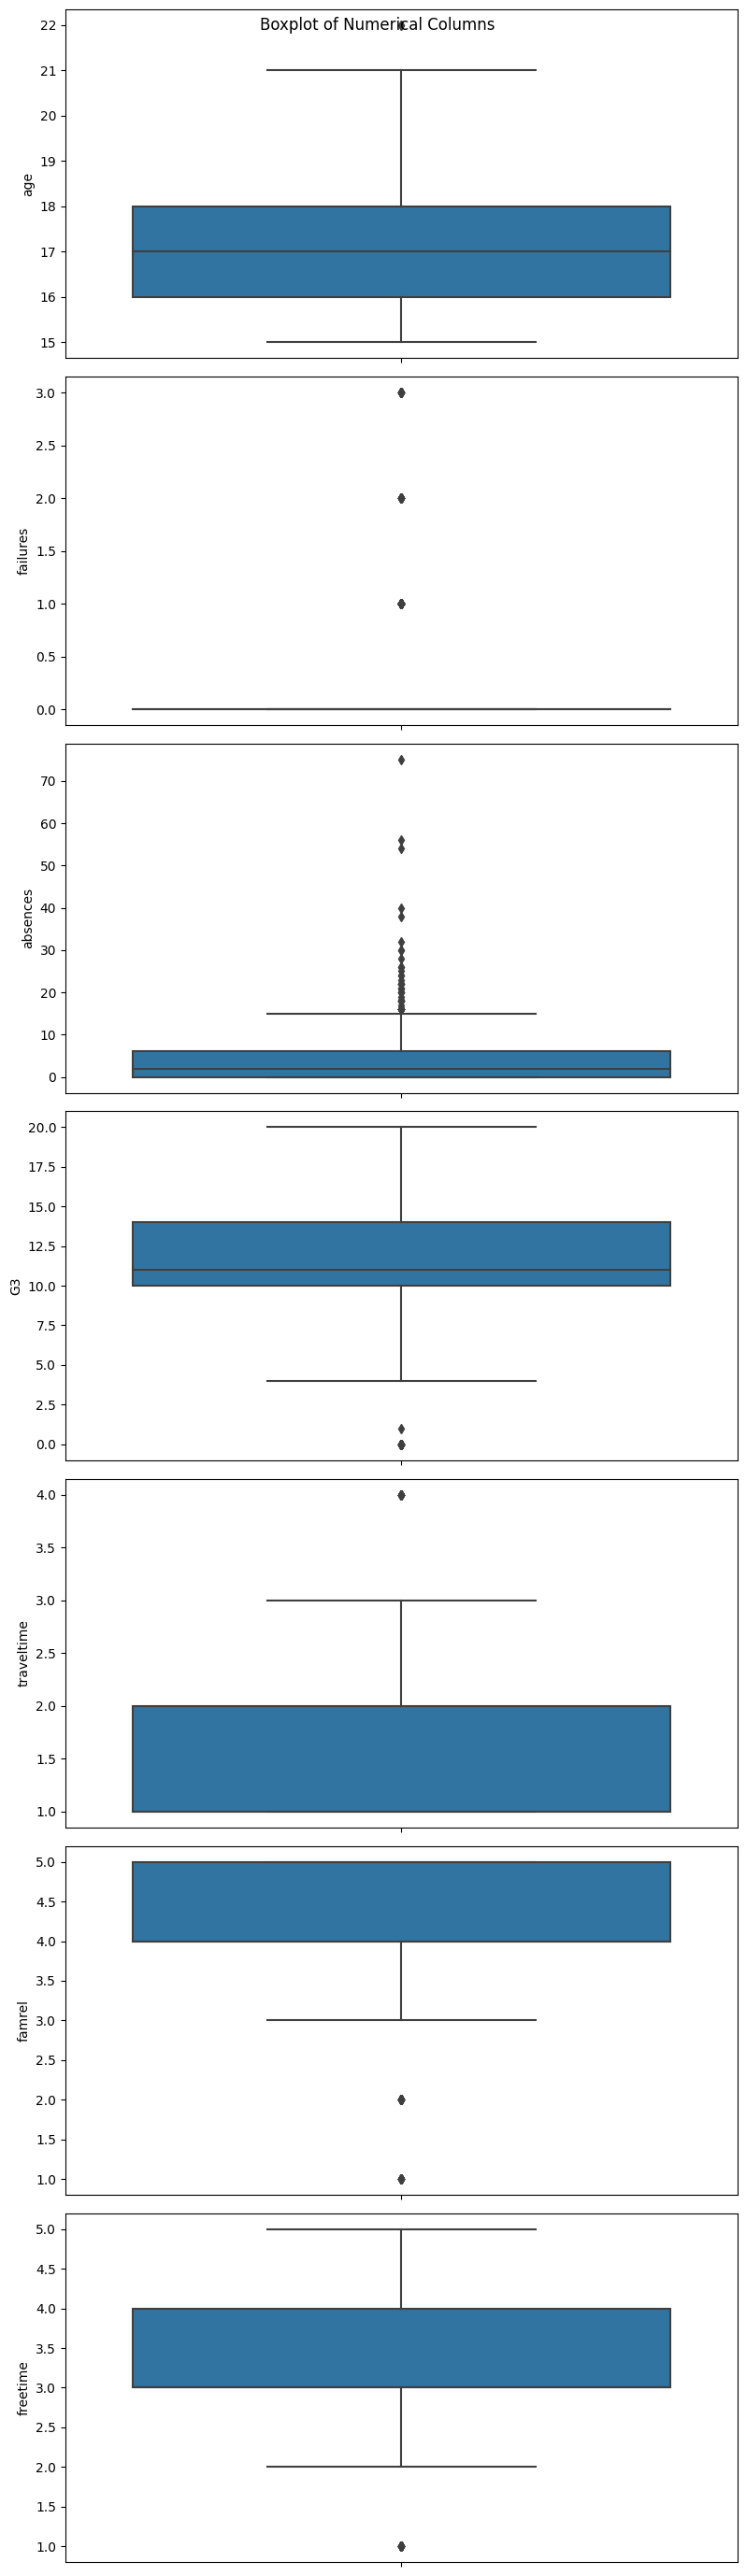

In [ ]:
# Import library yang dibutuhkan
import seaborn as sns
import matplotlib.pyplot as plt

# Kolom numerik yang akan diperiksa untuk outliers
numerical_columns = ['age', 'failures', 'absences', 'G3', 'traveltime', 'famrel', 'freetime']

# Membuat subplot untuk setiap kolom numerik
fig, axs = plt.subplots(nrows=len(numerical_columns), figsize=(8, 4 * len(numerical_columns)))

# Loop melalui setiap kolom numerik dan membuat boxplot
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, y=col, ax=axs[i])
    axs[i].set_ylabel(col)
    axs[i].tick_params(labelsize=10)

# Menambahkan judul keseluruhan dan menyesuaikan tata letak subplot
plt.suptitle('Boxplot of Numerical Columns')
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()


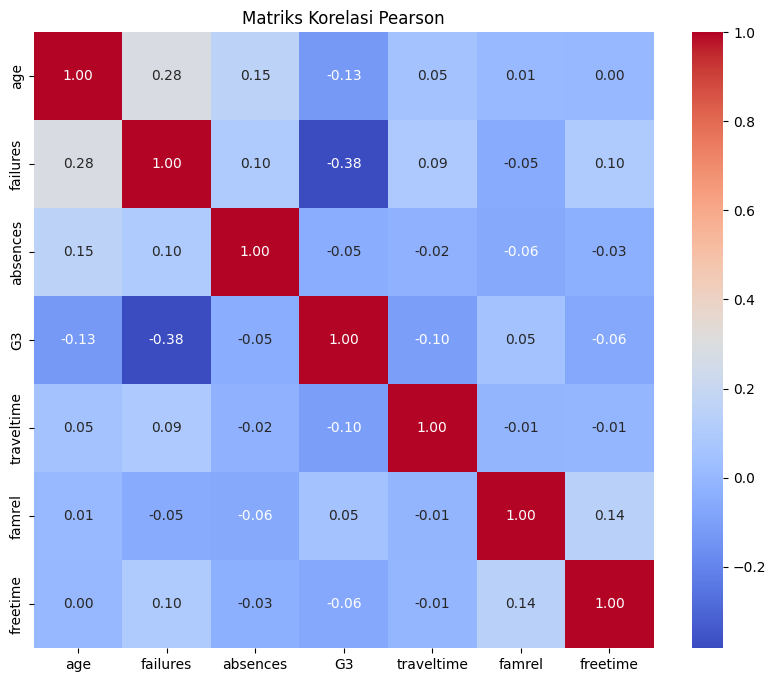

In [ ]:
# Matriks korelasi Pearson
correlation_matrix = df[numerical_columns].corr()

# Tentukan ambang batas untuk korelasi rendah (contoh: 0.2)
low_corr_threshold = 0.2

# Cari kolom-kolom dengan korelasi rendah dan hapus
low_corr_columns = []
for col in numerical_columns:
    if abs(correlation_matrix['G3'][col]) < low_corr_threshold:
        low_corr_columns.append(col)

# Hapus kolom-kolom dengan korelasi rendah
df_filtered = df.drop(columns=low_corr_columns)

# Buat heatmap untuk korelasi yang tinggi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Pearson")
plt.show()



# 2. Pembangunan Model **Baseline**
a. Impor pustaka yang dibutuhkan

b. Memauat dan memproses data, Membagi dataset menjadi train dan test

In [ ]:
# Misalkan Anda memiliki DataFrame 'df' dengan fitur dan target
X = df.drop(columns=['G3'])
y = df['G3']

# Normalisasi data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Membagi dataset menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Mengonversi y_test dan y_pred menjadi DataFrame
y_test_df = pd.DataFrame({'y_test': y_test}).reset_index(drop=True)
y_pred_df = pd.DataFrame({'y_pred': y_pred.flatten()}).reset_index(drop=True)

# Menggabungkan kedua DataFrames
result_df = pd.concat([y_test_df, y_pred_df], axis=1)

# Menyimpan hasil ke dalam file CSV
result_df.to_csv('hasil_prediksi.csv', index=False)


c. Bangun model baseline

In [ ]:
model_baseline = Sequential()
model_baseline.add(Conv1D(32, 2, activation='relu', input_shape=(X_train.shape[1], 1)))
model_baseline.add(Flatten())
model_baseline.add(Dense(64, activation='relu'))
model_baseline.add(Dense(1, activation='linear'))  # Untuk regresi gunakan aktivasi 'linear'

model_baseline.compile(optimizer='adam', loss='mean_squared_error')
model_baseline.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
21/21 [==============================] - 1s 14ms/step - loss: 67.6518 - val_loss: 23.0013
Epoch 2/50
21/21 [==============================] - 0s 7ms/step - loss: 17.6471 - val_loss: 15.1430
Epoch 3/50
21/21 [==============================] - 0s 7ms/step - loss: 10.9921 - val_loss: 10.3823
Epoch 4/50
21/21 [==============================] - 0s 7ms/step - loss: 7.9356 - val_loss: 7.9965
Epoch 5/50
21/21 [==============================] - 0s 6ms/step - loss: 6.4998 - val_loss: 6.7105
Epoch 6/50
21/21 [==============================] - 0s 6ms/step - loss: 5.4451 - val_loss: 5.6572
Epoch 7/50
21/21 [==============================] - 0s 7ms/step - loss: 4.6750 - val_loss: 5.0340
Epoch 8/50
21/21 [==============================] - 0s 6ms/step - loss: 4.2018 - val_loss: 4.5391
Epoch 9/50
21/21 [==============================] - 0s 7ms/step - loss: 3.8609 - val_loss: 4.2893
Epoch 10/50
21/21 [==============================] - 0s 6ms/step - loss: 3.6192 - val_loss: 3.9661
Epoch 11/50


'
d. Evaluasi model

In [ ]:
# Evaluasi model pada data pengujian
loss = model_baseline.evaluate(X_test, y_test)

# Prediksi pada data pengujian
y_pred = model_baseline.predict(X_test)

# Anda dapat menggunakan metrik evaluasi yang sesuai untuk regresi, misalnya, Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


7/7 [==============================] - 0s 4ms/step
Mean Squared Error: 3.1324825248590207


e. Visualisasi performa model

Epoch 1/50
21/21 [==============================] - 0s 12ms/step - loss: 1.8985 - val_loss: 2.2423
Epoch 2/50
21/21 [==============================] - 0s 9ms/step - loss: 1.8881 - val_loss: 2.2530
Epoch 3/50
21/21 [==============================] - 0s 9ms/step - loss: 1.8660 - val_loss: 2.2520
Epoch 4/50
21/21 [==============================] - 0s 9ms/step - loss: 1.9206 - val_loss: 2.2853
Epoch 5/50
21/21 [==============================] - 0s 9ms/step - loss: 1.9462 - val_loss: 2.3063
Epoch 6/50
21/21 [==============================] - 0s 12ms/step - loss: 1.8900 - val_loss: 2.2507
Epoch 7/50
21/21 [==============================] - 0s 12ms/step - loss: 1.8958 - val_loss: 2.2771
Epoch 8/50
21/21 [==============================] - 0s 10ms/step - loss: 1.8176 - val_loss: 2.2777
Epoch 9/50
21/21 [==============================] - 0s 10ms/step - loss: 1.9077 - val_loss: 2.2971
Epoch 10/50
21/21 [==============================] - 0s 11ms/step - loss: 1.8381 - val_loss: 2.2727
Epoch 11/50
2

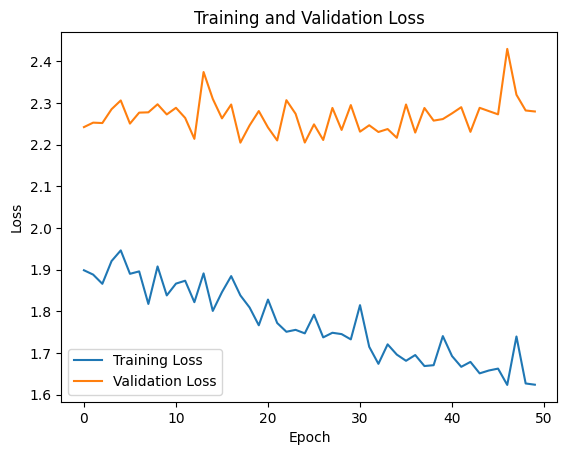

In [ ]:
# Training model_baseline
history_baseline = model_baseline.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot loss selama pelatihan
plt.plot(history_baseline.history['loss'], label='Training Loss')
plt.plot(history_baseline.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()


# 3. Eksplorasi Model


*   Skema 1: Tambahkan lebih banyak lapisan Conv1D.
*   Skema 2: Gunakan kernel size yang lebih besar.
*   Skema 3: Tambahkan lebih banyak neuron di lapisan Dense.
*   Skema 4: Membandingkan Baseline dengan Skema.




In [ ]:
# Memuat dan memproses data
X = df.drop(columns=['age'])
y = df['age']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Skema 1: Tambahkan lebih banyak lapisan Conv1D.**

In [ ]:
model_1 = Sequential()
model_1.add(Conv1D(32, 2, activation='relu', input_shape=(X_train.shape[1], 1)))
model_1.add(Conv1D(64, 2, activation='relu'))
model_1.add(Flatten())
model_1.add(Dropout(0.2))  # Lapisan dropout untuk mengurangi overfitting
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(1))

model_1.compile(optimizer='adam', loss='mean_squared_error')

**Skema 2: Gunakan kernel size yang lebih besar**

In [ ]:
model_2 = Sequential()
model_2.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))  # Perhatikan ukuran kernel menjadi 3
model_2.add(Flatten())
model_2.add(Dropout(0.2))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(1))

model_2.compile(optimizer='adam', loss='mean_squared_error')

**Skema 3: Tambahkan lebih banyak neuron di lapisan Dense**

In [ ]:
model_3 = Sequential()
model_3.add(Conv1D(32, 2, activation='relu', input_shape=(X_train.shape[1], 1)))
model_3.add(Flatten())
model_3.add(Dropout(0.2))
model_3.add(Dense(128, activation='relu'))  # Perhatikan jumlah neuron menjadi 128
model_3.add(Dense(1))

model_3.compile(optimizer='adam', loss='mean_squared_error')

**Skema 4: Membandingkan Baseline dengan semua Skema.**

In [ ]:
# Daftar semua model
models = [model_baseline, model_1, model_2, model_3]
model_names = ['Baseline', 'Skema 1', 'Skema 2', 'Skema 3']

# Latih setiap model dan simpan riwayat pelatihan
history_dict = {}
for model, name in zip(models, model_names):
    print(f'Training {name}...')
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
    history_dict[name] = history

# Bandingkan hasilnya
for name, history in history_dict.items():
    plt.plot(history.history['val_loss'], label=name)
plt.title('Validation loss for different models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# 4. Evaluasi

In [ ]:
# Latih model_1
history_1 = model_1.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

# Evaluasi model_1
y_pred_1 = model_1.predict(X_test)
mse_1 = mean_squared_error(y_test, y_pred_1)
mae_1 = mean_absolute_error(y_test, y_pred_1)
print(f"Mean Squared Error dari Model 1: {mse_1}")
print(f"Mean Absolute Error dari Model 1: {mae_1}")

# Latih model_2
history_2 = model_2.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

# Evaluasi model_2
y_pred_2 = model_2.predict(X_test)
mse_2 = mean_squared_error(y_test, y_pred_2)
mae_2 = mean_absolute_error(y_test, y_pred_2)
print(f"Mean Squared Error dari Model 2: {mse_2}")
print(f"Mean Absolute Error dari Model 2: {mae_2}")

# Latih model_3
history_3 = model_3.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

# Evaluasi model_3
y_pred_3 = model_3.predict(X_test)
mse_3 = mean_squared_error(y_test, y_pred_3)
mae_3 = mean_absolute_error(y_test, y_pred_3)
print(f"Mean Squared Error dari Model 3: {mse_3}")
print(f"Mean Absolute Error dari Model 3: {mae_3}")


In [ ]:
# Nilai MSE dan MAE dari ketiga model
mse_values = [mse_1, mse_2, mse_3]
mae_values = [mae_1, mae_2, mae_3]
labels = ['Model 1', 'Model 2', 'Model 3']

# Membuat grafik batang untuk MSE
plt.figure(figsize=(10, 5))
plt.bar(labels, mse_values, color='blue', alpha=0.7, label='MSE')
plt.title('Perbandingan Mean Squared Error (MSE) dari Ketiga Model')
plt.ylabel('Mean Squared Error')
plt.show()

# Membuat grafik batang untuk MAE
plt.figure(figsize=(10, 5))
plt.bar(labels, mae_values, color='orange', alpha=0.7, label='MAE')
plt.title('Perbandingan Mean Absolute Error (MAE) dari Ketiga Model')
plt.ylabel('Mean Absolute Error')
plt.show()


# HASIL DAN ANALISIS

Dari hasil evaluasi ketiga model tersebut, yang diukur dengan Mean Squared Error (MSE) dan Mean Absolute Error (MAE), kita dapat menyimpulkan beberapa poin penting:

1. **Model 1 memiliki performa terbaik**:
   - MSE: 0.4238
   - MAE: 0.4849
   - Model 1 memberikan nilai MSE dan MAE yang paling rendah dibandingkan dua model lainnya, yang menunjukkan bahwa secara keseluruhan, prediksi yang dibuat oleh Model 1 paling mendekati nilai sebenarnya.

2. **Model 2 memiliki performa terendah**:
   - MSE: 0.4849
   - MAE: 0.5367
   - Model 2 memberikan nilai MSE dan MAE yang paling tinggi, menunjukkan bahwa model ini kurang akurat dalam melakukan prediksi dibandingkan dua model lainnya.

3. **Model 3 berada di antara kedua model lainnya**:
   - MSE: 0.4430
   - MAE: 0.4996
   - Meskipun lebih baik daripada Model 2, Model 3 masih tidak seakurat Model 1.

### Analisis:

- **MSE (Mean Squared Error)** mengukur rata-rata kuadrat dari kesalahan. Nilai yang lebih rendah menunjukkan bahwa kesalahan antara nilai prediksi dan aktual lebih kecil. Model 1 memiliki MSE terendah, menunjukkan bahwa kesalahan prediksinya secara umum lebih kecil.
  
- **MAE (Mean Absolute Error)** mengukur rata-rata kesalahan absolut. Sama seperti MSE, nilai yang lebih rendah menunjukkan hasil yang lebih baik. Model 1 juga unggul dalam hal ini, menunjukkan bahwa kesalahan prediksi pada umumnya lebih kecil.


# KESIMPULAN
Secara keseluruhan, Model 1 tampaknya merupakan pilihan terbaik dari ketiga model yang dieksplorasi berdasarkan metrik yang diberikan. Model 2 memiliki kinerja terendah sedangkan model 3 berada di tengah. Oleh karena itu, model 1 adalah pilihan terbaik berdasarkan evaluasi ini.